In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assignment 2

## Invariance of SIFT Features

### Invariance Under Changes in Scale
1. Compute SIFT keypoints for the reference image.
2. Scale reference image using scaling factors of (0.2, 0.5, 0.8, 1.25, 2, 5).
3. Compute SIFT keypoints for the transformed images.
4. Match all keypoints of the reference image to the transformed images using a brute-force method.
5. Sort matching keypoints according to the matching distance.
6. Display top ten matched keypoints for each pair of reference image and a transformed image.
7. Plot the matching distance for top 100 matched keypoints. Plot indices of keypoints on x-axis and corresponding matching distance on y-axis.
8. Discuss the trend in the plotted results. What is the effect of increasing the scale on the matching distance? Reason the cause.

### Invariance Under Rotation
1. Compute SIFT keypoints for the reference image.
2. Rotate reference image at the angle of (10, 30, 90, 150, 170, 180).
3. Compute SIFT keypoints for the transformed images.
4. Match all keypoints of the reference image to the transformed images using
a brute-force method.
5. Sort matching keypoints according to the matching distance.
6. Display top ten matched keypoints for each pair of reference image and a transformed image.
7. Plot the matching distance for top 100 matched keypoints. Plot indices of keypoints on x-axis and corresponding matching distance on y-axis.
8. Discuss the trend in the plotted results. What is the effect of increasing the angle of rotation on the matching distance? Reason the cause.

### Invariance Under Changes in Scale

In [13]:
def display_single_image(img, name):
    """
    Display a single image nicely.

    @param img (::ndarray) the image
    @param name (:: string) the display name for the plot
    """
    plt.figure(figsize=(20, 20))
    plt.subplot(111), plt.imshow(img, cmap="gray")
    plt.title(name), plt.xticks([]), plt.yticks([])
    plt.show()

In [17]:
def convert_to_grey(img):
    """Returns the greyscale conversion of an image."""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

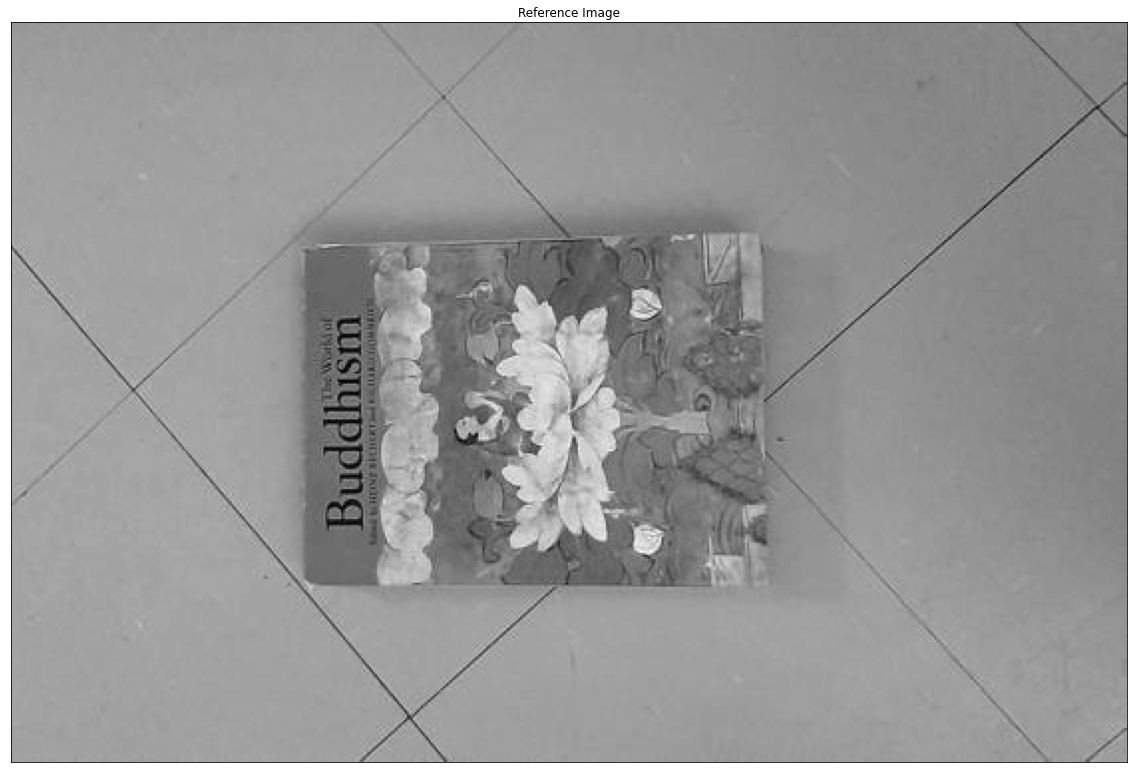

In [27]:
# load in reference image
book_img = cv2.imread("book.jpg")
grey_img = convert_to_grey(book_img)
book_copy = book_img.copy()
display_single_image(grey_img, "Reference Image")

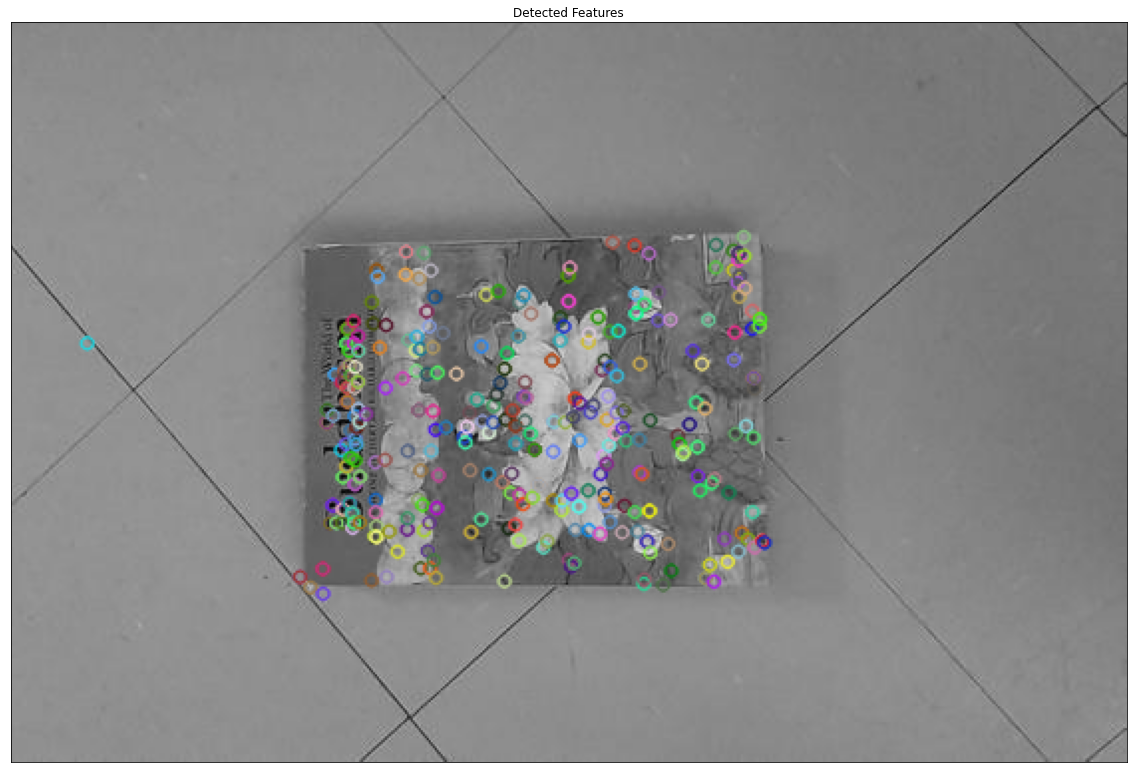

In [28]:
# compute SIFT keypoints
sift = cv2.SIFT_create()
book_kp = sift.detect(grey_img, None)
cv2.drawKeypoints(grey_img, book_kp, book_copy)
display_single_image(book_copy, "Detected Features")

In [34]:
# scale the images
SCALES = (0.2, 0.5, 0.8, 1.25, 2, 5)
scaled_books = [cv2.resize(book_img, dsize=(0,0), fx=scale, fy=scale) for scale in SCALES]
grey_scaled_books = list(map(convert_to_grey, scaled_books))
scaled_books_copies = list(map(lambda img: img.copy(), scaled_books))

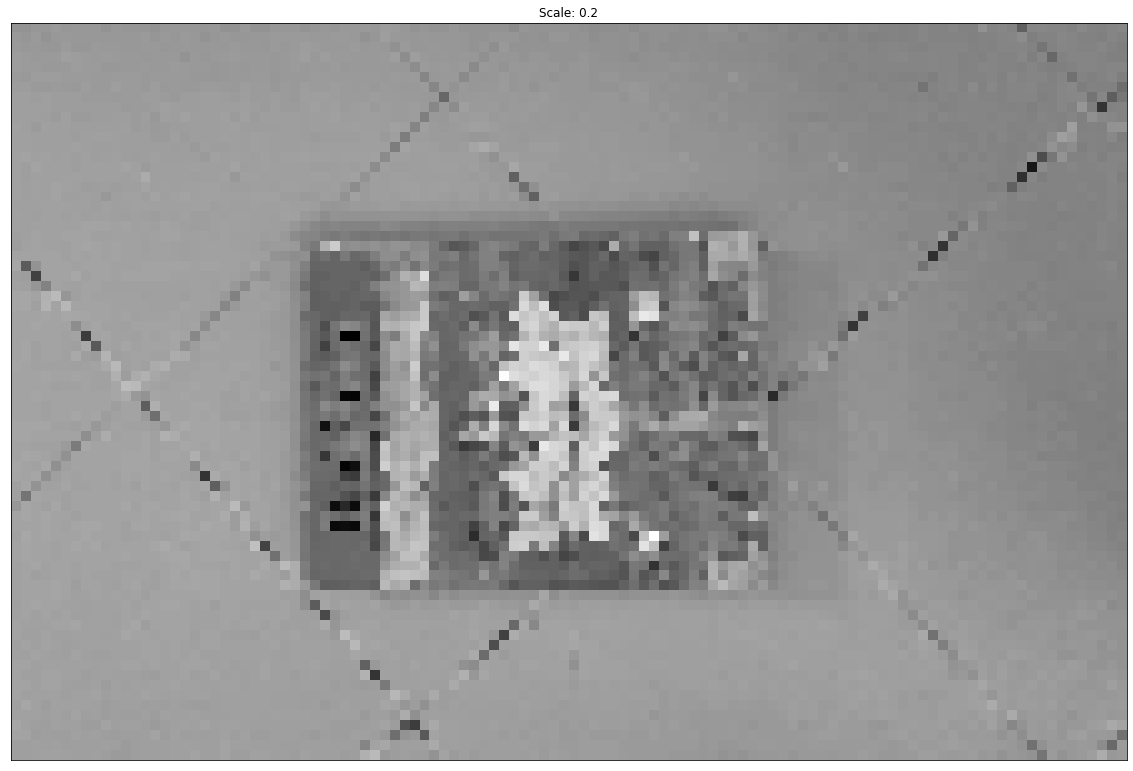

In [36]:
display_single_image(grey_scaled_books[0], "Scale: 0.2")